In [33]:
import pyrealsense2 as rs
import numpy as np
import time
import os
import matplotlib.pyplot as plt
import open3d as o3d
import sys


parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)
from realsense.realsense import Camera
from realsense.realsense import get_devices

In [34]:
base_dir = "../../example_data"
os.makedirs(base_dir, exist_ok=True)

# left camera

Selected device serial numbers: 023522070524
RGB Intrinsics: [[919.48522949   0.         636.58465576]
 [  0.         919.66876221 359.48773193]
 [  0.           0.           1.        ]]
RGB Distortion Coefficients: [0.0, 0.0, 0.0, 0.0, 0.0]
Depth Scale: 0.0010000000474974513
Depth Intrinsics: [[631.2769165    0.         640.80444336]
 [  0.         631.2769165  359.92080688]
 [  0.           0.           1.        ]]
Depth Distortion Coefficients: [0.0, 0.0, 0.0, 0.0, 0.0]


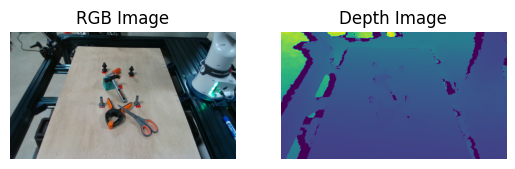

In [35]:
device_serial = '023522070524'

# Print selected device serial numbers
print("Selected device serial numbers:", device_serial)

rgb_resolution = (1280, 720)  # RGB resolution (width, height)
depth_resolution = (1280, 720)  # Depth resolution (width, height)

camera = Camera(device_serial, rgb_resolution, depth_resolution)

# Delay before shooting (in seconds)
delay_before_shooting = 3

try:
    camera.start()
    
    rgb_intrinsics, rgb_coeffs, depth_intrinsics, depth_coeffs = camera.get_intrinsics_matrix()
    print(f"RGB Intrinsics: {rgb_intrinsics}")
    print(f"RGB Distortion Coefficients: {rgb_coeffs}")
    depth_scale = camera.get_depth_scale()
    print(f"Depth Scale: {depth_scale}")
    print(f"Depth Intrinsics: {depth_intrinsics}")
    print(f"Depth Distortion Coefficients: {depth_coeffs}")
    
    
    time.sleep(delay_before_shooting)  # Introduce delay before shooting
    color_image, depth_image = camera.shoot()
    depth_image = depth_image * depth_scale
    if color_image is not None and depth_image is not None:
        # show the rgb and depth images
        plt.subplot(1, 2, 1)
        plt.imshow(color_image)
        plt.title('RGB Image')
        plt.axis('off')
        plt.subplot(1, 2, 2)
        plt.imshow(depth_image)
        plt.title('Depth Image')
        plt.axis('off')
        plt.show()
    else:
        print(f"Failed to capture images from camera {camera.serial_number}")
    rgb_filename = os.path.join(base_dir, f'images/left.png')
    depth_filename = os.path.join(base_dir, f'depth/left.npy')
    plt.imsave(rgb_filename, color_image)
    np.save(depth_filename, depth_image)

finally:
    camera.stop()

# right camera

Selected device serial numbers: 233622078546
RGB Intrinsics: [[909.07989502   0.         633.57348633]
 [  0.         908.37561035 361.85162354]
 [  0.           0.           1.        ]]
RGB Distortion Coefficients: [0.0, 0.0, 0.0, 0.0, 0.0]
Depth Scale: 0.0010000000474974513
Depth Intrinsics: [[646.82611084   0.         643.04882812]
 [  0.         646.82611084 358.82620239]
 [  0.           0.           1.        ]]
Depth Distortion Coefficients: [0.0, 0.0, 0.0, 0.0, 0.0]


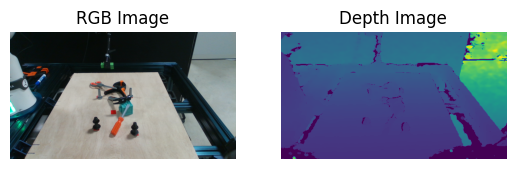

In [36]:
# Enumerate connected RealSense cameras
device_serial = '233622078546'

# Print selected device serial numbers
print("Selected device serial numbers:", device_serial)

rgb_resolution = (1280, 720)  # RGB resolution (width, height)
depth_resolution = (1280, 720)  # Depth resolution (width, height)

camera = Camera(device_serial, rgb_resolution, depth_resolution)

# Delay before shooting (in seconds)
delay_before_shooting = 3

try:
    camera.start()
    
    rgb_intrinsics, rgb_coeffs, depth_intrinsics, depth_coeffs = camera.get_intrinsics_matrix()
    print(f"RGB Intrinsics: {rgb_intrinsics}")
    print(f"RGB Distortion Coefficients: {rgb_coeffs}")
    depth_scale = camera.get_depth_scale()
    print(f"Depth Scale: {depth_scale}")
    print(f"Depth Intrinsics: {depth_intrinsics}")
    print(f"Depth Distortion Coefficients: {depth_coeffs}")
    
    
    time.sleep(delay_before_shooting)  # Introduce delay before shooting
    color_image, depth_image = camera.shoot()
    depth_image = depth_image * depth_scale
    if color_image is not None and depth_image is not None:
        # show the rgb and depth images
        plt.subplot(1, 2, 1)
        plt.imshow(color_image)
        plt.title('RGB Image')
        plt.axis('off')
        plt.subplot(1, 2, 2)
        plt.imshow(depth_image)
        plt.title('Depth Image')
        plt.axis('off')
        plt.show()
    else:
        print(f"Failed to capture images from camera {camera.serial_number}")
    rgb_filename = os.path.join(base_dir, f'images/right.png')
    depth_filename = os.path.join(base_dir, f'depth/right.npy')
    plt.imsave(rgb_filename, color_image)
    np.save(depth_filename, depth_image)

finally:
    camera.stop()